In [38]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [41]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9ed5714189687454c27c9cc55e769bb


In [44]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [45]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | raudeberg
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | samarkand
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | mecca
Processing Record 8 of Set 1 | japura
Processing Record 9 of Set 1 | martapura
Processing Record 10 of Set 1 | luwuk
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | arlit
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | dombarovskiy
Processing Record 16 of Set 1 | hualmay
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | olkhovka
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | ugoofaaru
Processing Record 23 of Set 1 | shahr-e babak


Processing Record 35 of Set 4 | mar del plata
Processing Record 36 of Set 4 | qaqortoq
Processing Record 37 of Set 4 | kedrovyy
Processing Record 38 of Set 4 | frontera
Processing Record 39 of Set 4 | lashio
Processing Record 40 of Set 4 | ixtapa
Processing Record 41 of Set 4 | southampton
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | kenai
Processing Record 44 of Set 4 | vasto
Processing Record 45 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | fairview
Processing Record 48 of Set 4 | dingli
Processing Record 49 of Set 4 | camacha
Processing Record 50 of Set 4 | maine-soroa
Processing Record 1 of Set 5 | oranjemund
Processing Record 2 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 3 of Set 5 | vila
Processing Record 4 of Set 5 | flin flon
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | kuche
City not found. Skipping...
Processing Record 7 of Set 5 

Processing Record 24 of Set 8 | felipe carrillo puerto
Processing Record 25 of Set 8 | moyobamba
Processing Record 26 of Set 8 | tsabong
Processing Record 27 of Set 8 | adana
Processing Record 28 of Set 8 | sur
Processing Record 29 of Set 8 | kindu
Processing Record 30 of Set 8 | sindor
Processing Record 31 of Set 8 | juneau
Processing Record 32 of Set 8 | belyy yar
Processing Record 33 of Set 8 | borogontsy
Processing Record 34 of Set 8 | nanortalik
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | salinas
Processing Record 37 of Set 8 | salinopolis
Processing Record 38 of Set 8 | salihli
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | san ignacio
Processing Record 41 of Set 8 | khorramshahr
Processing Record 42 of Set 8 | dongsheng
Processing Record 43 of Set 8 | ijaki
City not found. Skipping...
Processing Record 44 of Set 8 | dolores
Processing Record 45 of Set 8 | kodinsk
Processing Record 46 of Set 8 | uzhur
Processing Record 4

Processing Record 13 of Set 12 | kilindoni
Processing Record 14 of Set 12 | tarudant
City not found. Skipping...
Processing Record 15 of Set 12 | shar
Processing Record 16 of Set 12 | manaus
Processing Record 17 of Set 12 | san quintin
Processing Record 18 of Set 12 | calvinia
Processing Record 19 of Set 12 | korla
Processing Record 20 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 21 of Set 12 | turkistan
Processing Record 22 of Set 12 | pochutla
Processing Record 23 of Set 12 | le pontet
Processing Record 24 of Set 12 | santa cruz
Processing Record 25 of Set 12 | uglegorsk
Processing Record 26 of Set 12 | bosobolo
Processing Record 27 of Set 12 | mitchell
Processing Record 28 of Set 12 | kinablangan
Processing Record 29 of Set 12 | mandan
Processing Record 30 of Set 12 | narsingdi
Processing Record 31 of Set 12 | bellevue
Processing Record 32 of Set 12 | hatillo
Processing Record 33 of Set 12 | plettenberg bay
Processing Record 34 of Set 12 | kerouane
Processin

In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-37.82,80,69,4.61,RU,2021-02-06 16:01:33
1,Raudeberg,61.9875,5.1352,26.60,50,0,5.75,NO,2021-02-06 15:59:27
2,Airai,-8.9266,125.4092,61.00,97,100,1.97,TL,2021-02-06 16:01:33
3,Komsomolskiy,40.4272,71.7189,44.60,49,100,6.91,UZ,2021-02-06 16:01:34
4,Samarkand,39.6542,66.9597,57.20,33,75,11.50,UZ,2021-02-06 16:01:34
5,Carnarvon,-24.8667,113.6333,80.60,100,75,12.66,AU,2021-02-06 16:01:34
6,Mecca,21.4267,39.8261,71.37,45,57,12.35,SA,2021-02-06 15:59:46
7,Japura,-0.3167,102.3500,75.61,84,75,1.01,ID,2021-02-06 16:01:34
8,Martapura,-3.4167,114.8500,78.80,94,100,3.44,ID,2021-02-06 15:58:01
9,Luwuk,-0.9516,122.7875,77.77,74,100,3.02,ID,2021-02-06 16:01:35


In [47]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-02-06 16:01:33,71.9167,114.0833,-37.82,80,69,4.61
1,Raudeberg,NO,2021-02-06 15:59:27,61.9875,5.1352,26.60,50,0,5.75
2,Airai,TL,2021-02-06 16:01:33,-8.9266,125.4092,61.00,97,100,1.97
3,Komsomolskiy,UZ,2021-02-06 16:01:34,40.4272,71.7189,44.60,49,100,6.91
4,Samarkand,UZ,2021-02-06 16:01:34,39.6542,66.9597,57.20,33,75,11.50
5,Carnarvon,AU,2021-02-06 16:01:34,-24.8667,113.6333,80.60,100,75,12.66
6,Mecca,SA,2021-02-06 15:59:46,21.4267,39.8261,71.37,45,57,12.35
7,Japura,ID,2021-02-06 16:01:34,-0.3167,102.3500,75.61,84,75,1.01
8,Martapura,ID,2021-02-06 15:58:01,-3.4167,114.8500,78.80,94,100,3.44
9,Luwuk,ID,2021-02-06 16:01:35,-0.9516,122.7875,77.77,74,100,3.02


In [48]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [50]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612627388.7268069

In [51]:
today = time.strftime("%x")
today

'02/06/21'

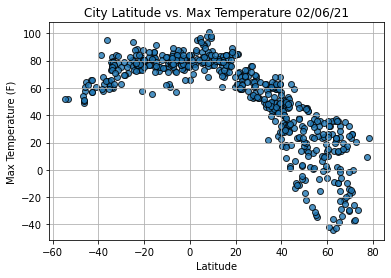

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

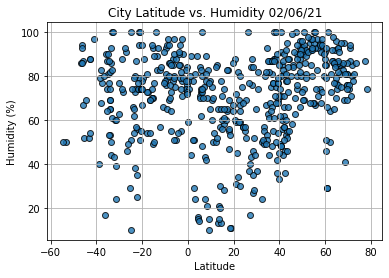

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

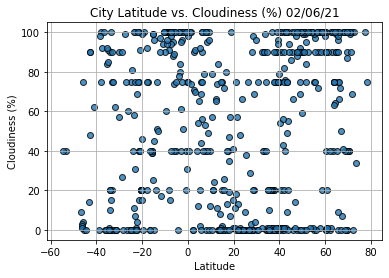

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

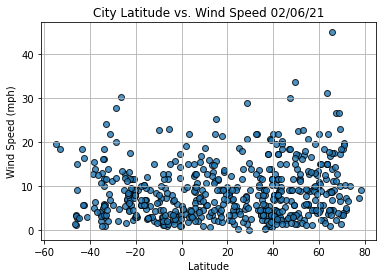

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [69]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [70]:
index13 = city_data_df.loc[13]
index13

City                       Yulara
Country                        AU
Date          2021-02-06 15:59:56
Lat                      -25.2406
Lng                       130.989
Max Temp                     80.6
Humidity                       29
Cloudiness                      0
Wind Speed                   9.22
Name: 13, dtype: object

In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-02-06 16:01:33,71.9167,114.0833,-37.82,80,69,4.61
1,Raudeberg,NO,2021-02-06 15:59:27,61.9875,5.1352,26.60,50,0,5.75
3,Komsomolskiy,UZ,2021-02-06 16:01:34,40.4272,71.7189,44.60,49,100,6.91
4,Samarkand,UZ,2021-02-06 16:01:34,39.6542,66.9597,57.20,33,75,11.50
6,Mecca,SA,2021-02-06 15:59:46,21.4267,39.8261,71.37,45,57,12.35
11,Arlit,NE,2021-02-06 16:01:35,18.7369,7.3853,86.13,11,100,13.13
14,Dombarovskiy,RU,2021-02-06 16:01:35,50.7587,59.5386,14.76,93,100,22.57
18,Broome,US,2021-02-06 16:01:36,42.2506,-75.8330,28.99,46,40,17.27
19,Olkhovka,RU,2021-02-06 16:01:36,53.2115,60.6069,24.31,95,100,22.73
21,Ugoofaaru,MV,2021-02-06 16:01:36,5.6667,73.0000,82.08,73,69,9.78


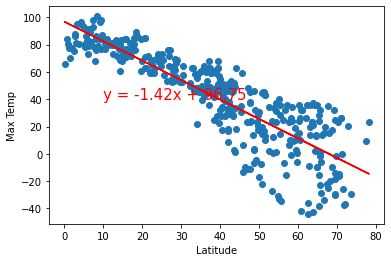

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

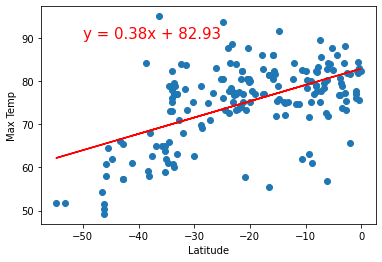

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

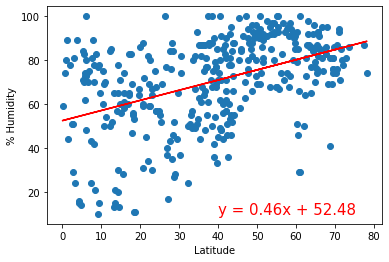

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

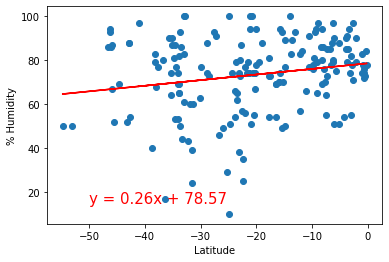

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

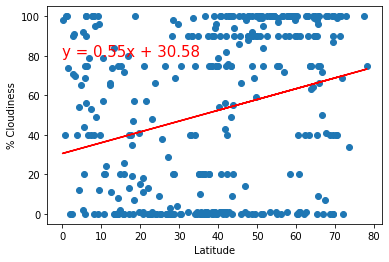

In [77]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

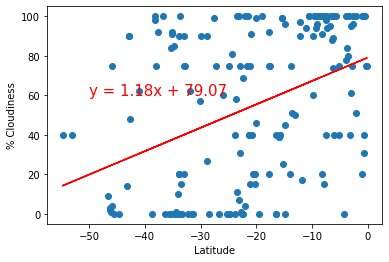

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

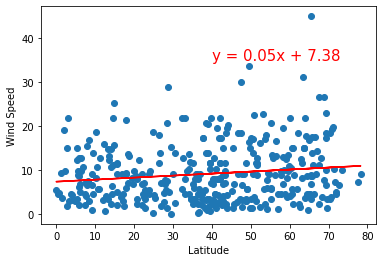

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

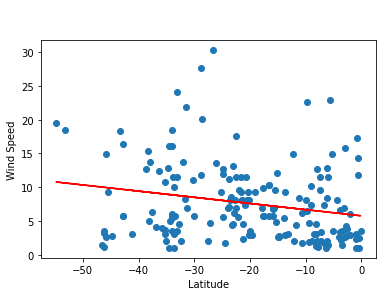

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))